In [99]:
# Import all necessary libraries.
import numpy as np
from scipy.special import erfc
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [100]:
# Number of QPSK symbols to be transmitted.
N = 1000000

In [101]:
# Instantiate K-means.
km = KMeans(n_clusters=4, init='k-means++')

In [102]:
#A)
# Create Es/N0 vector.
EsN0dB = np.arange(-2,21,2)

ser_simu = np.zeros(len(EsN0dB))
ser_theo = np.zeros(len(EsN0dB))
for idx in range(0,len(EsN0dB)):
    
    #print('Es/N0 dB:', EsN0dB[idx])
    
    EsN0Lin = 10.0**(-(EsN0dB[idx]/10.0))
    
    # Generate N QPSK symbols.
    ip = (2.0 * (np.random.rand(N) >= 0.5) - 1.0).reshape(N, 1) + 1j*(2.0 * (np.random.rand(N) >= 0.5) - 1.0).reshape(N, 1)
    # Normalization of energy to 1.
    ip = (1/np.sqrt(2))*ip
    
    # Generate noise vector with unitary variance.
    noise = np.sqrt(1.0/2.0)*(np.random.randn(N, 1) + 1j*np.random.randn(N, 1))
    
    # Pass symbols through AWGN channel.
    y = ip + np.sqrt(EsN0Lin)*noise
    
    y_re = y.real
    y_im = y.imag
    y = np.concatenate((y_re, y_im), axis=1)
    
    # Fit and prediction model for real part.
    km.fit_predict(y)
    
    c = np.zeros((4,2))
    for i in range(0,4):
        c[i,0] = km.cluster_centers_[i][0]
        c[i,1] = km.cluster_centers_[i][1]
        #print('Centroid %d: (%1.2f, %1.2f)' % (i,km.cluster_centers_[i][0],km.cluster_centers_[i][1]))
        
    matrix_new = np.zeros((y.shape[0],c.shape[0]))
    for i in range(c.shape[0]):
        for k in range(y.shape[0]):
            dist = 0
            for l in range(y.shape[1]):
                dist = dist + (y[k,l] - c[i,l])**2
            matrix_new[k,i] = np.sqrt(dist)
    
    index = np.zeros((y.shape[0],1))
    for i in range(y.shape[0]):
        q = np.argmin(matrix_new[i,:])
        index[i,0] = q

    symb = np.array([[1/np.sqrt(2),1/np.sqrt(2)],[-1/np.sqrt(2),1/np.sqrt(2)],[1/np.sqrt(2),-1/np.sqrt(2)],[-1/np.sqrt(2),-1/np.sqrt(2)]])
    
    symb_detected = np.zeros((y.shape[0],2))
    for i in range(index.shape[0]):
        matrix_new = np.zeros((symb.shape[0],1))
        for k in range(symb.shape[0]):
            dist = 0
            for l in range(symb.shape[1]):
                dist = dist + (symb[k,l] - c[int(index[i,0]),l])**2
            matrix_new[k,0] = np.sqrt(dist)
            
        symb_detected[i,0] = symb[np.argmin(matrix_new),0]
        symb_detected[i,1] = symb[np.argmin(matrix_new),1]
    
    # Simulated QPSK BER.
    error_re = (ip.real != symb_detected[:,0].reshape(symb_detected.shape[0],1))
    error_im = (ip.imag != symb_detected[:,1].reshape(symb_detected.shape[0],1))
    error = 0
    for i in range(0, N): 
        if(error_re[i]==True or error_im[i]==True): 
            error += 1
    
    ser_simu[idx] = 1.0 * error / N
    
    # Theoretical QPSK BER.    
    ser_theo[idx] = erfc(np.sqrt(0.5*(10.0**(EsN0dB[idx]/10.0)))) - (1/4)*(erfc(np.sqrt(0.5*(10.0**(EsN0dB[idx]/10.0)))))**2.0
    

Es/N0:-2 	- BER: 3.813090e-01
Es/N0:0 	- BER: 2.916750e-01
Es/N0:2 	- BER: 1.969060e-01
Es/N0:4 	- BER: 1.096210e-01
Es/N0:6 	- BER: 4.519700e-02
Es/N0:8 	- BER: 1.194500e-02
Es/N0:10 	- BER: 1.615000e-03
Es/N0:12 	- BER: 7.600000e-05
Es/N0:14 	- BER: 0.000000e+00
Es/N0:16 	- BER: 0.000000e+00
Es/N0:18 	- BER: 0.000000e+00
Es/N0:20 	- BER: 0.000000e+00

B.


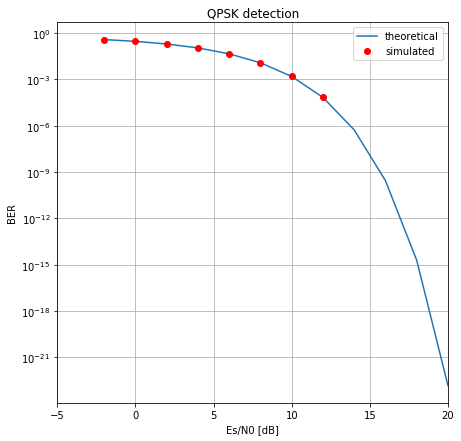

In [112]:
# Print Es/N0 versus BER values.
for i in range(0,len(ser_simu)): print('Es/N0:%d \t- BER: %e' % (EsN0dB[i], ser_simu[i]))

# Plot Es/N0 versus BER values.
print('\nB.')
fig = plt.figure(figsize=(7,7))
plt.plot(EsN0dB, ser_theo, label='theoretical')
plt.plot(EsN0dB, ser_simu, 'ro', label='simulated')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Es/N0 [dB]')
plt.ylabel('BER')
plt.grid(True)
plt.title('QPSK detection')
plt.legend()
plt.xlim([-5, 20])
#plt.ylim([1e-20, 1])
plt.savefig("qpsk_ber_curves.png", dpi=600)
plt.show()

In [113]:
print('C. A curva simulada se aproxima da curva teórica da SER')

C. A curva simulada se aproxima da curva teórica da SER
